<a href="https://colab.research.google.com/github/ThinhdanghocDE/BTL-AI/blob/main/BTL_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 2.7 MB/s eta 0:00:00


In [6]:
pip install ml-dtypes==0.5.1

In [5]:
pip install tensorboard==2.19.0

In [4]:
pip install tensorflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.


In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import hvplot.pandas
import tensorflow as tf

#**PHÂN TÍCH BỘ DỮ LIỆU GỐC**

##*Đọc dữ liệu*

In [9]:
df=pd.read_csv(r"/Goc.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


##*a) Biểu đồ tần suất của biến mục tiêu deposit*

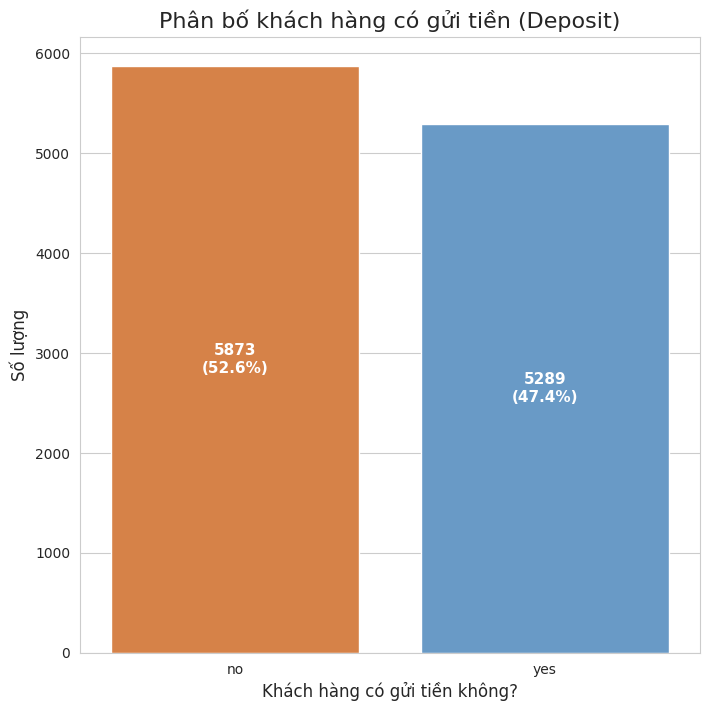

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Vẽ biểu đồ đếm cho biến 'deposit'
plt.figure(figsize=(8, 8))
ax = sns.countplot(
    x='deposit',
    data=df,
    hue='deposit',
    palette=['#5A9BD5', '#ED7D31'],
    order=['no', 'yes'],
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Phân bố khách hàng có gửi tiền (Deposit)', fontsize=16)
plt.xlabel('Khách hàng có gửi tiền không?', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số lượng và phần trăm BÊN TRONG cột
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height * 0.5,  # Giữa cột
        f'{int(height)}\n({height/len(df)*100:.1f}%)',
        ha="center", va='center',
        fontsize=11, color='white', weight='bold'
    )

plt.show()


####Biểu đồ "Tần suất của biến mục tiêu **deposit**" được sử dụng để đánh giá sự phân bố giữa các lớp dữ liệu, ở đây cụ thể là khách hàng có gửi tiền tiết kiệm hay không. Kết quả phân tích chỉ ra rằng bộ dữ liệu có sự cân bằng cao giữa hai lớp quyết định của khách hàng.
####Cụ thể: Có 5.873 mẫu thuộc lớp "Không gửi tiền" (chiếm 52.6%) và 5.289 mẫu thuộc lớp "Gửi tiền" (chiếm 47.4%).
####Kết luận: Sự cân bằng gần như 1:1 giữa hai lớp là một điều kiện lý tưởng để huấn luyện mô hình dự đoán. Điều này giúp giảm nguy cơ thiên lệch (bias) về phía nhóm chiếm đa số – một vấn đề thường gây khó khăn trong các bài toán phân loại. Nhờ đó, mô hình có thể học được đặc trưng của cả hai nhóm một cách khách quan hơn, từ đó nâng cao độ chính xác và tính khái quát khi áp dụng vào dữ liệu thực tế.